In [ ]:
!pip install -q opencv-python-headless

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image


In [ ]:
# Configure matplotlib for inline display
%matplotlib inline

In [ ]:
uploaded = files.upload()


Saving pexels-pixabay-36762.jpg to pexels-pixabay-36762.jpg


(np.float64(-0.5), np.float64(6164.5), np.float64(4107.5), np.float64(-0.5))

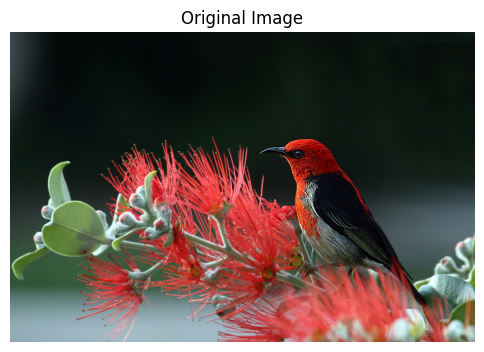

In [ ]:
for fname in uploaded.keys():
    image_name = fname
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

In [ ]:
for fname in uploaded:
    color_img = cv2.imread(fname)
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

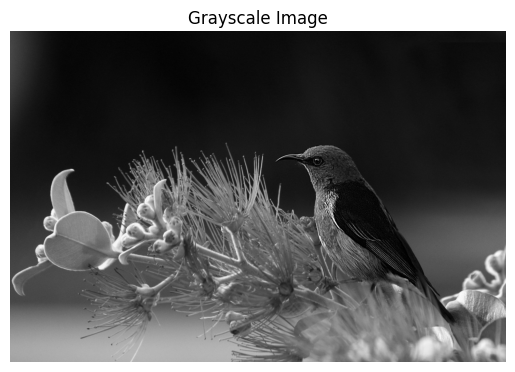

In [ ]:
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

## **Task 1 : Intensity Level Reduction**

In [28]:
from ipywidgets import interact, Dropdown
from IPython.display import display

def reduce_intensity_strict(levels):

    factor = 256 // levels
    reduced = (gray_img // factor) * factor
    reduced = reduced.astype(np.uint8)

    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].imshow(gray_img, cmap='gray'); axs[0].set_title("Original"); axs[0].axis('off')
    axs[1].imshow(reduced, cmap='gray'); axs[1].set_title(f"{levels} Levels"); axs[1].axis('off')
    plt.show()

valid_levels = [2, 4, 8, 16, 32, 64, 128, 256]
interact(reduce_intensity_strict, levels=Dropdown(options=valid_levels, value=2, description='Intensity Levels'));


interactive(children=(Dropdown(description='Intensity Levels', options=(2, 4, 8, 16, 32, 64, 128, 256), value=…

# **Task 2 : Spatial Averaging (Smoothing)**

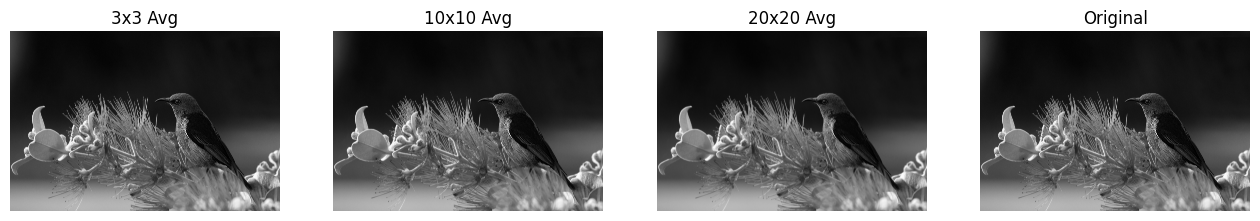

In [ ]:
def spatial_average_gray(image, ksize):
    return cv2.blur(image, (ksize, ksize))

ksizes = [3, 10, 20]
avg_outputs = [(k, spatial_average_gray(gray_img, k)) for k in ksizes]

plt.figure(figsize=(16,5))
for i, (k, out) in enumerate(avg_outputs):
    plt.subplot(1, len(avg_outputs)+1, i+1)
    plt.imshow(out, cmap='gray')
    plt.title(f"{k}x{k} Avg")
    plt.axis('off')

plt.subplot(1, len(avg_outputs)+1, len(avg_outputs)+1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.show()

# **Task 3 : Image Rotation (45° and 90°)**

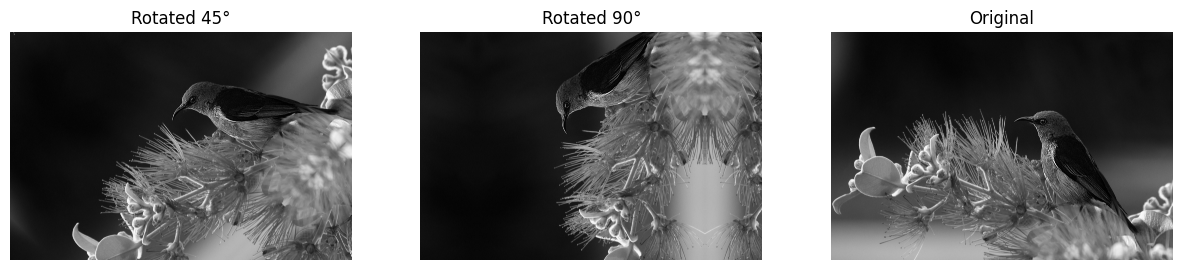

In [ ]:
def rotate_gray(image, angle):
    h, w = image.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_REFLECT)

angles = [45, 90]
rotations = [(a, rotate_gray(gray_img, a)) for a in angles]

fig, axs = plt.subplots(1, len(rotations)+1, figsize=(15,5))
for i, (a, out) in enumerate(rotations):
    axs[i].imshow(out, cmap='gray'); axs[i].set_title(f"Rotated {a}°"); axs[i].axis('off')

axs[-1].imshow(gray_img, cmap='gray'); axs[-1].set_title("Original"); axs[-1].axis('off')
plt.show()

# **Task 4 : Resolution Reduction Using Block Averaging (Non-overlapping)**

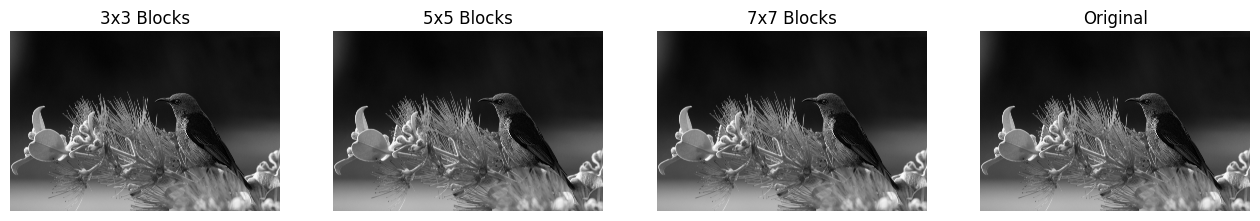

In [ ]:
def block_avg_gray(image, block_size):
    h, w = image.shape
    result = np.copy(image)
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = image[y:y+block_size, x:x+block_size]
            if block.shape[0] < block_size or block.shape[1] < block_size:
                continue
            avg = np.mean(block)
            result[y:y+block_size, x:x+block_size] = avg
    return result.astype(np.uint8)

block_sizes = [3, 5, 7]
block_results = [(b, block_avg_gray(gray_img, b)) for b in block_sizes]

plt.figure(figsize=(16,5))
for i, (b, out) in enumerate(block_results):
    plt.subplot(1, len(block_results)+1, i+1)
    plt.imshow(out, cmap='gray'); plt.title(f"{b}x{b} Blocks"); plt.axis('off')

plt.subplot(1, len(block_results)+1, len(block_results)+1)
plt.imshow(gray_img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.show()